In [1]:
#白黒画像のみ。
#matching領域は手動で指定
#縦の連結でも横の連結でもOK
#マッチング箇所の2つの点(x1,y1)と(x2,y2)を入力する

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
meth = 4
method = eval(methods[meth]) 

def tmp_match(image,template,method=0):         
    res = cv2.matchTemplate(image,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        left_top = min_loc  #x,y
        peak_val = min_val
    else:
        left_top = max_loc
        peak_val = max_val

    h,w = template.shape
    img_dbg = image.copy()
    bottom_right = (left_top[0] + w, left_top[1] + h) #矩形の右下の座標計算(x,y)
    cv2.rectangle(img_dbg,left_top, bottom_right, (0,0,0), 2)
    return(res,peak_val,img_dbg,left_top)

def min_max_norm(image):
    a = np.min(image)
    b = np.max(image)
    im_out = (image - a) / (b-a) *255
    im_out = im_out.astype(np.uint8)
    return(im_out)

def merge_image(im1,im2,left1,top1,left2,top2):
    im1_y, im1_x = im1.shape
    im2_y,im2_x = im2.shape
    max_img =np.zeros((im1_y + im2_y*2,im1_x + im2_x*2),np.uint8)
    max_img[im2_y:im2_y+im1_y, im2_x:im2_x + im1_x] = im1.copy()
    max_img[im2_y +  top1-top2:2*im2_y + top1-top2,im2_x+left1 - left2:2*im2_x+left1 - left2] = im2.copy()
#     plt.imshow(max_img,cmap=cm.gray,vmin=0,vmax=255)
#     plt.show()
    
    y_min,y_max= cal_black(max_img,1)
    x_min,x_max= cal_black(max_img,0)

    im_merge = max_img[y_min:y_max,x_min:x_max]
    return im_merge 

def cal_black(image,axis_num):
    line_n = np.sum(image,axis=axis_num)
    
    df = pd.DataFrame(line_n)
    df_selected = df[df[0]!=0]
    df_selected.index
    
    min_n  = df_selected.index[0]
    max_n = df_selected.index[-1]
    return(min_n,max_n)

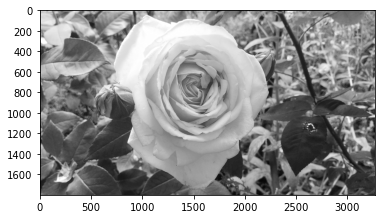

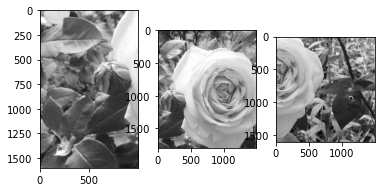

In [3]:
#test-image
path = "DSC_1049.jpg"
im = cv2.imread(path,0)
plt.imshow(im[200:2000],cmap=cm.gray)
plt.show()
im_cut1 = im[400:2000,0:1000]
plt.subplot(131),plt.imshow(im_cut1,cmap=cm.gray)
im_cut2 = im[0:1800,500:2000]
plt.subplot(132),plt.imshow(im_cut2,cmap=cm.gray)
im_cut3 = im[400:2000,1500:3000]
plt.subplot(133),plt.imshow(im_cut3,cmap=cm.gray)
plt.show()

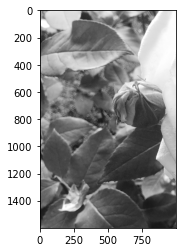

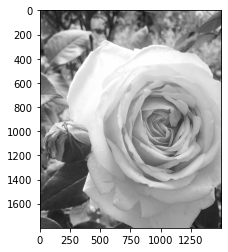

im1_y,im1_x =  (1600, 1000) im2_y,im2_x =  (1800, 1500)


In [4]:
im1 = im_cut1
plt.imshow(im1,cmap=cm.gray)
plt.show()
im2  = im_cut2
plt.imshow(im2,cmap=cm.gray)
plt.show()

im1_y, im1_x = im1.shape
im2_y,im2_x = im2.shape
print("im1_y,im1_x = ",im1.shape,"im2_y,im2_x = ",im2.shape)

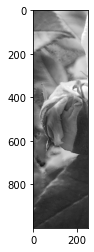

500 200


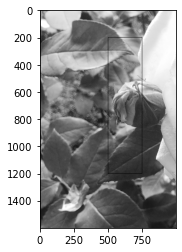

In [5]:
y_cut = 600 #top2
x_cut = 0 #left2
y_cut2 = 1600 
x_cut2 = 250
template= im2[y_cut:y_cut2,x_cut:x_cut2]
plt.imshow(template,cmap=cm.gray)
plt.show()
res,peak_val,img_dbg,left_top = tmp_match(im1,template,method=0)
left_x = left_top[0]
top_y = left_top[1]
print(left_x, top_y) #left1,top1
plt.imshow(img_dbg,cmap=cm.gray)

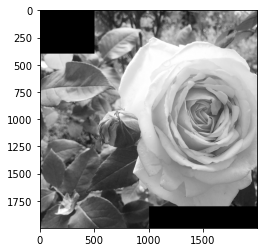

In [6]:
im_merge = merge_image(im1,im2,left1=left_x,top1=top_y,left2=x_cut,top2=y_cut)
plt.imshow(im_merge,cmap=cm.gray)

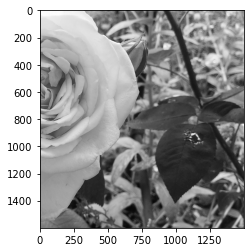

im1_y,im1_x =  (1999, 1999) im2_y,im2_x =  (1600, 1500)


In [7]:
im1 = im_merge.copy()
im2  = im_cut3
im2 = min_max_norm(im2)
plt.imshow(im2,cmap=cm.gray,vmin=0,vmax=255)
plt.show()

im1_y, im1_x = im1.shape
im2_y,im2_x = im2.shape
print("im1_y,im1_x = ",im1.shape,"im2_y,im2_x = ",im2.shape)

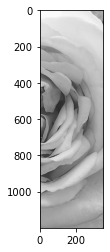

1550 400


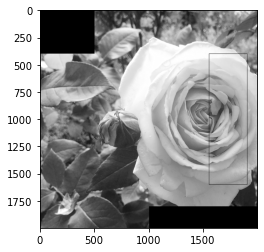

In [8]:
y_cut = 0
x_cut = 50
y_cut2 = 1200
x_cut2 = 400
template= im2[y_cut:y_cut2,x_cut:x_cut2]
plt.imshow(template,cmap=cm.gray)
plt.show()
res,peak_val,img_dbg,left_top = tmp_match(im1,template,method=0)
left_x = left_top[0]
top_y = left_top[1]
print(left_x, top_y)

plt.imshow(img_dbg,cmap=cm.gray)
plt.show()

In [9]:
print((left_x,top_y),(x_cut,y_cut))

(1550, 400) (50, 0)


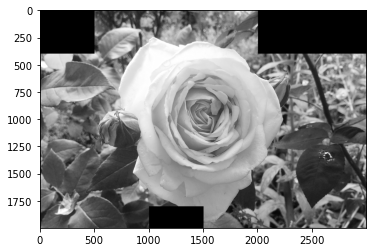

In [10]:
im_merge = merge_image(im1,im2,left1=left_x,top1=top_y,left2=x_cut,top2=y_cut)
plt.imshow(im_merge,cmap=cm.gray)